# Clase de Python para Data Science

In [7]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [8]:
# df es base de datos del archivo Salaries
df = pd.read_csv("Salaries.csv")

In [9]:
df

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954


In [17]:
df.tail()

,rank,discipline,phd,service,sex,salary
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954
77,Prof,A,23,15,Female,109646


In [18]:
df.dtypes

rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object

In [29]:
df["sex"].dtypes

dtype('O')

In [32]:
df.shape

(78, 6)

In [43]:
df.sample(8)

,rank,discipline,phd,service,sex,salary
65,Prof,A,36,19,Female,117555
0,Prof,B,56,49,Male,186960
15,Prof,B,17,3,Male,150480
39,Prof,B,18,18,Female,129000
30,AssocProf,B,9,7,Male,107008
32,Prof,A,27,19,Male,103275
46,AsstProf,B,11,3,Female,74692
56,AssocProf,A,10,8,Female,77500


In [46]:
df_rank=df.groupby("sex")

In [47]:
df_rank.mean()

,phd,service,salary
sex,,,
Female,16.512821,11.564103,101002.410256
Male,22.897436,18.538462,115045.153846


In [48]:
df_sub = df[df["salary"] > 120000 ]

In [53]:
df_sub.tail()

,rank,discipline,phd,service,sex,salary
49,Prof,B,17,18,Female,122960
51,Prof,B,20,14,Female,127512
58,Prof,B,36,26,Female,144651
72,Prof,B,24,15,Female,161101
75,Prof,B,17,17,Female,124312


In [57]:
df_1 = df[["salary"]]

In [58]:
df_1

,salary
0,186960
1,93000
2,110515
3,131205
4,104800
...,...
73,105450
74,104542
75,124312
76,109954


In [64]:
df_1 = df.iloc[10:20, [ 1, 2]]

In [65]:
df_1

,discipline,phd
10,B,39
11,B,23
12,B,1
13,B,35
14,B,25
15,B,17
16,B,8
17,B,4
18,A,19
19,A,29


In [70]:
df_ordenada = df.sort_values( by="service")

In [71]:
df_ordenada

,rank,discipline,phd,service,sex,salary
55,AsstProf,A,2,0,Female,72500
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000
...,...,...,...,...,...,...
40,Prof,A,39,36,Female,137000
27,Prof,A,45,43,Male,155865
36,Prof,B,45,45,Male,146856
0,Prof,B,56,49,Male,186960


In [72]:
df.notnull()

,rank,discipline,phd,service,sex,salary
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
73,True,True,True,True,True,True
74,True,True,True,True,True,True
75,True,True,True,True,True,True
76,True,True,True,True,True,True


In [74]:
5df.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [75]:
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

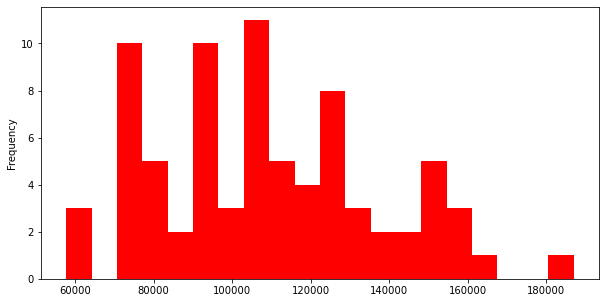

In [133]:
df.salary.plot(kind="hist",bins=20,figsize=(10,5) , color='red')

<AxesSubplot:xlabel='sex', ylabel='salary'>

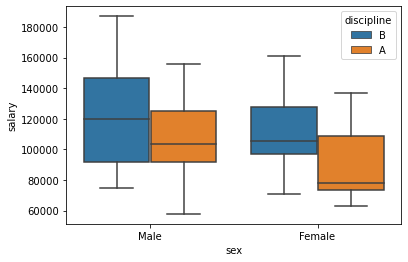

In [80]:
# Gráfico de Cajas
sns.boxplot(x="sex",y="salary",hue="discipline",data=df)

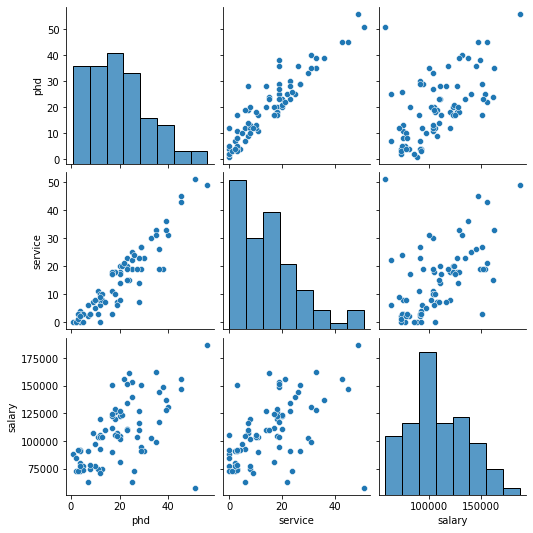

In [81]:
#Diagrama de pares
sns.pairplot(df)

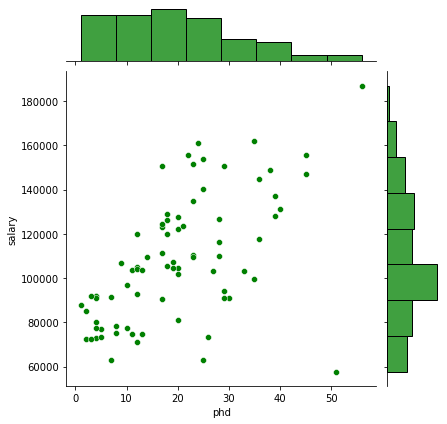

In [130]:
sns.jointplot(x="phd",y="salary",data=df , color='green')

In [119]:
%matplotlib inline 
import matplotlib.pyplot as plt 
from sklearn import datasets, linear_model 
from sklearn.metrics import mean_squared_error, r2_score 

In [120]:
#Seleción de datos
X= df.service[:, np.newaxis]

C:\Users\MANMART\AppData\Local\Temp/ipykernel_18500/2544112366.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X= df.service[:, np.newaxis]


In [121]:
#Datos de Entrenamiento
X_train = X[:-30]
#Datos de Prueba
X_test = X[-30:]

In [122]:
#Datos de Entrenamiento
y_train = df.salary[:-30]
#Datos de Prueba
y_test = df.salary[-30:]

In [123]:
#Librerias necesarias 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
regr = LinearRegression()

In [124]:
#Regresión
regr.fit(X_train, y_train)

LinearRegression()

In [125]:
y_pred = regr.predict(X_test)

In [126]:
print('Pendiente: \n', regr.coef_)
print("Error Medio Cuadrado: %.2f" % mean_squared_error(y_test, y_pred))
print('Coeficiente de Correlación: %.2f' % r2_score(y_test, y_pred))

Pendiente: 
 [1166.69163414]
Error Medio Cuadrado: 531411503.42
Coeficiente de Correlación: 0.06


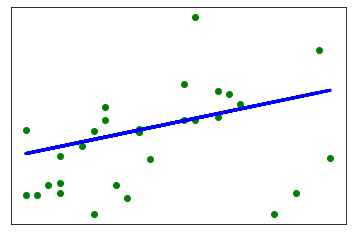

In [129]:
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()